In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

all = pd.DataFrame(pd.read_excel('sensordata_excel/complete_data_left_right_anomalie_mech.xlsx'))

all2 = pd.DataFrame(pd.read_excel('sensordata_excel/complete_data_left_right_anomalie_data.xlsx'))


data = all[['acc.ax','acc.ay','acc.az','acc.gx','acc.gy','acc.gz','gyro.gx','gyro.gy','gyro.gz']]

target = all['target']

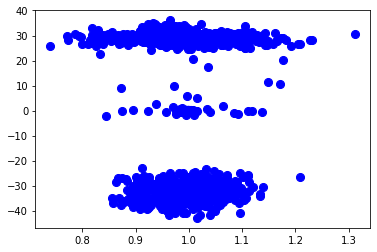

In [28]:
# plot data
%matplotlib inline
plt.scatter(data['acc.az'], data['gyro.gz'], color = "b", s = 65)


In [29]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier 


In [30]:

X = data[['acc.az', 'gyro.gz']]

nbrs = NearestNeighbors(n_neighbors =5)
nbrs.fit(X)

NearestNeighbors()

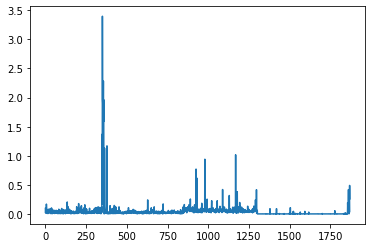

In [31]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis = 1))

In [32]:

outlier_index = np.where(distances.mean(axis = 1) > 1.2)
outlier_index

(array([348, 350, 351, 352, 353, 354, 355, 356, 357, 358], dtype=int64),)

In [33]:
# filter outlier values
outlier_values = data.iloc[outlier_index]
outlier_values

,acc.ax,acc.ay,acc.az,acc.gx,acc.gy,acc.gz,gyro.gx,gyro.gy,gyro.gz
348,-0.003416,-0.084424,0.833992,2.73,2.03,21.56,-0.069565,-0.626087,22.817390
350,0.001464,0.049776,1.035048,1.47,-3.22,17.57,-1.043478,-0.973913,17.530440
351,-0.036600,-0.007808,1.176080,-3.64,-2.52,19.11,1.321739,-0.904348,20.173910
352,0.064904,0.233752,1.008208,6.09,-1.75,16.94,-7.443478,3.130435,20.452170
353,-0.056120,0.268400,1.170712,1.75,-3.57,2.80,-4.521739,-1.600000,10.504350
354,0.047336,0.093696,0.972584,2.45,-3.50,12.95,1.600000,-1.182609,9.947826
355,-0.013664,0.210328,1.147776,2.80,-0.49,6.44,-3.339130,-1.460870,11.408700
356,-0.118584,0.158600,0.996984,-2.87,-6.79,0.70,1.600000,0.556522,5.773913
357,-0.026352,0.030256,0.872056,1.05,-2.87,5.32,-0.417391,-1.530435,9.113044
358,-0.054168,0.052704,1.015040,-1.54,-5.25,1.12,1.947826,-0.695652,4.869565


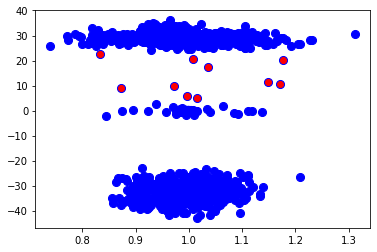

In [34]:
# plot data
plt.scatter(data['acc.az'], data['gyro.gz'], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values['acc.az'], outlier_values['gyro.gz'], color = "r")

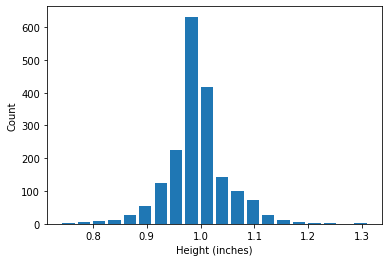

In [35]:
plt.hist(data['acc.az'], bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

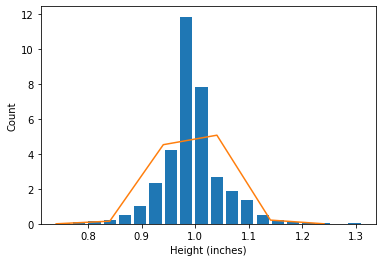

In [36]:
from scipy.stats import norm
import numpy as np
plt.hist(data['acc.az'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(data['acc.az'].min(), data['acc.az'].max(), 0.1)
plt.plot(rng, norm.pdf(rng,data['acc.az'].mean(),data['acc.az'].std()))

In [37]:
data['acc.az'].mean()

0.9937399743315508

In [38]:
data['acc.az'].std()

0.05515912540593589

In [39]:
upper_limit = data['acc.az'].mean() + data['acc.az'].std()
upper_limit
upper_limit2 = data['acc.gz'].mean() + data['acc.gz'].std()
upper_limit

1.0488990997374867

In [40]:
lower_limit = data['acc.az'].mean() - data['acc.az'].std()
lower_limit2 = data['acc.gz'].mean() - data['acc.gz'].std()
lower_limit

0.9385808489256149

In [41]:
data[(data['acc.az']>upper_limit) | (data['acc.az']<lower_limit)]


,acc.ax,acc.ay,acc.az,acc.gx,acc.gy,acc.gz,gyro.gx,gyro.gy,gyro.gz
0,-0.033672,-0.069784,1.158024,-5.04,-5.39,24.92,-0.208696,-4.730435,26.782610
1,-0.045384,0.149816,1.056032,-1.12,0.35,25.06,-0.069565,-2.365217,28.521740
2,0.022936,0.010736,0.818864,4.69,-3.36,26.39,1.043478,5.773913,27.130430
4,-0.027328,0.109312,1.126304,1.54,-5.74,29.19,2.295652,6.191304,27.965220
5,0.013176,-0.056608,1.094096,1.47,-4.83,24.43,1.043478,2.017391,29.078260
...,...,...,...,...,...,...,...,...,...
1859,-0.096136,-0.017568,1.136552,4.48,-9.17,-1.19,1.947826,-0.069565,-0.556522
1862,0.011224,0.067832,1.110688,1.82,-4.27,-2.66,-0.069565,-1.460870,0.000000
1863,0.032696,0.163968,0.923296,-17.29,-2.73,-2.31,2.921739,-1.947826,-0.139130
1865,0.048312,0.019032,0.843752,-4.20,-4.69,-0.70,6.608696,5.286956,-1.947826


In [42]:
df_no_outlier_std_dev = data[(data['acc.az']<upper_limit) & (data['acc.az']>lower_limit)]
df_no_outlier_std_dev.head()

,acc.ax,acc.ay,acc.az,acc.gx,acc.gy,acc.gz,gyro.gx,gyro.gy,gyro.gz
3,-0.072712,0.190808,1.031632,-2.66,-5.88,27.09,-2.226087,0.695652,28.59130
11,-0.026840,0.191296,0.999912,3.57,-4.20,27.09,-4.591304,-1.669565,29.49565
16,-0.019032,-0.017568,0.947696,-3.01,-2.59,30.17,1.391304,2.504348,29.56522
17,0.010248,0.000488,0.997960,2.17,-2.87,24.08,1.878261,2.156522,26.57391
18,0.024888,-0.005368,1.005768,-1.05,-2.59,27.23,-2.643478,0.208696,27.47826


In [43]:
df_no_outlier_std_dev.shape

(1404, 9)

In [44]:
data.shape

(1870, 9)

In [45]:
data['zscore'] = (data['acc.az'] - data['acc.az'].mean() ) / data['acc.az'].std()
data['zscore2'] = (data['gyro.gz'] - data['gyro.gz'].mean() ) / data['gyro.gz'].std()

df = pd.DataFrame(columns= ['out_acc.az', 'out_gyro.gz']) 

i = -1
for x in data['zscore']:
    i = i + 1
    if (x > 3.5):
        df = df.append({'out_acc.az' : data['acc.az'].loc[i], 'out_gyro.gz' : data['gyro.gz'].loc[i]}, ignore_index=True)
        
    if (x < - 3.5):
        df = df.append({'out_acc.az' : data['acc.az'].loc[i], 'out_gyro.gz' : data['gyro.gz'].loc[i]}, ignore_index=True)

i = -1
for x in data['zscore2']:
    i = i + 1
    if (x > 1.5):
        df = df.append({'out_acc.az' : data['acc.az'].loc[i], 'out_gyro.gz' : data['gyro.gz'].loc[i]}, ignore_index=True)
        
    if (x < - 2):
        df = df.append({'out_acc.az' : data['acc.az'].loc[i], 'out_gyro.gz' : data['gyro.gz'].loc[i]}, ignore_index=True)


C:\Users\alexa\AppData\Local\Temp\ipykernel_22696\2575522068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zscore'] = (data['acc.az'] - data['acc.az'].mean() ) / data['acc.az'].std()
C:\Users\alexa\AppData\Local\Temp\ipykernel_22696\2575522068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zscore2'] = (data['gyro.gz'] - data['gyro.gz'].mean() ) / data['gyro.gz'].std()
C:\Users\alexa\AppData\Local\Temp\ipykernel_22696\2575522068.py:10: FutureWarning: The frame.append method is deprecat

In [46]:
data[data['zscore']>3.5]

,acc.ax,acc.ay,acc.az,acc.gx,acc.gy,acc.gz,gyro.gx,gyro.gy,gyro.gz,zscore,zscore2
6,-0.010736,0.069784,1.192184,-2.17,-0.56,24.43,0.834783,1.530435,25.94783,3.597664,0.831403
134,-0.075640,0.019520,1.311256,3.15,0.21,25.97,0.765217,6.747826,30.46956,5.756364,1.012834
212,-0.021960,0.019032,1.204384,-1.54,-0.84,23.31,-0.208696,0.973913,26.43478,3.818843,0.850941
218,0.017568,0.147864,1.230736,1.47,-0.98,25.27,-3.060869,3.408696,28.03478,4.296588,0.915140
250,-0.003416,0.161528,1.227320,-0.35,-2.87,26.25,4.382609,8.556521,28.38261,4.234658,0.929097
327,-0.039528,0.091744,1.208776,0.63,-0.28,29.26,-1.113043,2.086957,26.64348,3.898467,0.859315
916,-0.051728,0.084912,1.208288,-1.12,-7.21,-31.22,2.504348,14.469570,-26.36522,3.889620,-1.267620


In [47]:
data[data['zscore']<-3.5]

,acc.ax,acc.ay,acc.az,acc.gx,acc.gy,acc.gz,gyro.gx,gyro.gy,gyro.gz,zscore,zscore2
35,-0.034648,0.085400,0.798368,0.14,-2.38,26.18,-2.782609,-3.478261,29.49565,-3.541970,0.973756
38,-0.002440,0.048800,0.787144,-0.91,-5.95,26.74,-1.391304,-0.417391,30.46956,-3.745454,1.012834
204,-0.377224,0.354776,0.740296,4.97,-7.14,27.79,-1.182609,1.182609,25.66957,-4.594779,0.820238
206,0.086376,0.244488,0.773968,-1.96,0.00,23.52,-3.339130,-1.600000,28.03478,-3.984327,0.915140
213,0.091256,-0.004880,0.793976,2.31,-0.28,26.53,1.252174,1.739130,29.77391,-3.621594,0.984921
217,-0.004880,0.050752,0.771528,-3.71,-4.55,29.33,-1.043478,5.008696,29.98261,-4.028562,0.993295
312,-0.150792,0.185440,0.800320,3.29,-3.57,28.00,7.652174,0.486957,26.64348,-3.506582,0.859315


In [48]:
data[(data.zscore<-3.5) | (data.zscore>3.5 ) | (data.zscore2>1.5) | (data.zscore2 <-2)]

,acc.ax,acc.ay,acc.az,acc.gx,acc.gy,acc.gz,gyro.gx,gyro.gy,gyro.gz,zscore,zscore2
6,-0.010736,0.069784,1.192184,-2.17,-0.56,24.43,0.834783,1.530435,25.94783,3.597664,0.831403
35,-0.034648,0.085400,0.798368,0.14,-2.38,26.18,-2.782609,-3.478261,29.49565,-3.541970,0.973756
38,-0.002440,0.048800,0.787144,-0.91,-5.95,26.74,-1.391304,-0.417391,30.46956,-3.745454,1.012834
134,-0.075640,0.019520,1.311256,3.15,0.21,25.97,0.765217,6.747826,30.46956,5.756364,1.012834
204,-0.377224,0.354776,0.740296,4.97,-7.14,27.79,-1.182609,1.182609,25.66957,-4.594779,0.820238
206,0.086376,0.244488,0.773968,-1.96,0.00,23.52,-3.339130,-1.600000,28.03478,-3.984327,0.915140
212,-0.021960,0.019032,1.204384,-1.54,-0.84,23.31,-0.208696,0.973913,26.43478,3.818843,0.850941
213,0.091256,-0.004880,0.793976,2.31,-0.28,26.53,1.252174,1.739130,29.77391,-3.621594,0.984921
217,-0.004880,0.050752,0.771528,-3.71,-4.55,29.33,-1.043478,5.008696,29.98261,-4.028562,0.993295
218,0.017568,0.147864,1.230736,1.47,-0.98,25.27,-3.060869,3.408696,28.03478,4.296588,0.915140


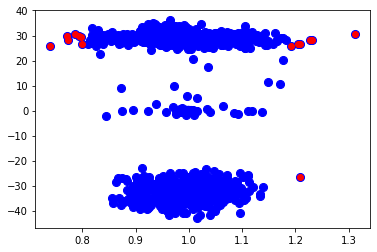

In [49]:
# plot data
plt.scatter(data['acc.az'], data['gyro.gz'], color = "b", s = 65)
# plot outlier value
plt.scatter(df['out_acc.az'] , df['out_gyro.gz'], color = "r")
